Just a work in Progress!

In [1]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cbook as cbook
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
df.columns = ['Feedback','Binary']
df

,Feedback,Binary
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [3]:
keywords = ['Excellent','great','good']

for key in keywords:
    df[str(key)]= df.Feedback.str.contains(
    ''+ str(key) +'',
        case=False
    )
    
df[str(key)]  

0      False
1       True
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13      True
14     False
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Name: good, Length: 1000, dtype: bool

In [4]:
df['allcaps'] = df.Feedback.str.isupper()
df['allcaps']

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976     True
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Name: allcaps, Length: 1000, dtype: bool

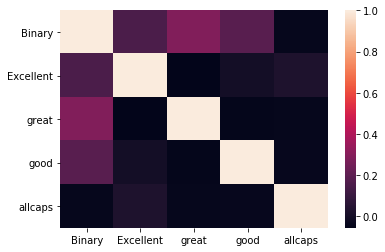

In [5]:
sns.heatmap(df.corr())

In [6]:
data = df[keywords + ['allcaps']]
target = df['Binary']

In [7]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of labeled points out of a total {} points : {}".format(
    data.shape[0],
    (target == y_pred).sum()
))


Number of labeled points out of a total 1000 points : 654


In [8]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier


import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [9]:
train, test = train_test_split(df,test_size = 0.1)
train, test

(                                              Feedback  Binary  Excellent  \
 591                 Linked to my phone without effort.       1      False   
 791    I own 2 of these cases and would order another.       1      False   
 831          All three broke within two months of use.       0      False   
 515                Mobile Phone Tools are a must have.       1      False   
 922                                     Happy so far!.       1      False   
 339  It is practically useless and did not add any ...       0      False   
 383  After trying many many handsfree gadgets this ...       1      False   
 257                                    Great Earpiece.       1      False   
 786                They work about 2 weeks then break.       0      False   
 440                                   Very Displeased.       0      False   
 77                        This is a great little item.       1      False   
 37                         Poor Talk Time Performance.       0 

In [10]:
a=1
b=0

train_pos = train[ train['Binary'] == int(a)]
train_pos = train_pos['Feedback']
train_neg = train[ train['Binary'] == int(b)]
train_neg = train_neg['Feedback']


In [30]:
train_pos = train[ train['Binary'] == int(a)]
train_pos

,Feedback,Binary,Excellent,great,good,allcaps
591,Linked phone without effort.,1,False,False,False,False
791,I 2 cases would order another.,1,False,False,False,False
515,Mobile Phone Tools must have.,1,False,False,False,False
922,Happy far!.,1,False,False,False,False
383,After trying many many handsfree gadgets one f...,1,False,False,False,False
257,Great Earpiece.,1,False,True,False,False
77,This great little item.,1,False,True,False,False
347,Good audio quality.,1,False,False,True,False
871,I received headset good time happy it.,1,False,False,True,False
807,The reception headset excellent.,1,True,False,False,False


In [31]:
train_neg = train[ train['Binary'] == int(b)]
train_neg 

,Feedback,Binary,Excellent,great,good,allcaps
831,All three broke within two months use.,0,False,False,False,False
339,It practically useless add kind boost receptio...,0,False,False,False,False
786,They work 2 weeks break.,0,False,False,False,False
440,Very Displeased.,0,False,False,False,False
37,Poor Talk Time Performance.,0,False,False,False,False
686,The instructions explain microphone jack could...,0,False,False,False,False
63,Buy different phone - this.,0,False,False,False,False
861,It waste money.,0,False,False,False,False
605,This infuriating.,0,False,False,False,False
845,Stay Away From Q!.,0,False,False,False,False


In [11]:
c=1
d=0

test_pos = test[ test['Binary'] == int(c)]
test_pos = test_pos['Feedback']
test_neg = test[ test['Binary'] == int(d)]
test_neg = test_neg['Feedback']


In [35]:
c=1
d=0

test_pos = test[ test['Binary'] == int(c)]
test_neg = test[ test['Binary'] == int(d)]
test_pos


,Feedback,Binary,Excellent,great,good,allcaps
120,I've tried several different earpieces cell ph...,1,False,False,False,False
92,Worked great!.,1,False,True,False,False
207,I've nearly 2 years worked great me.,1,False,True,False,False
651,I found product easy set use.,1,False,False,False,False
25,Great Pocket PC / phone combination.,1,False,True,False,False
423,I'm using iriver SPINN (with case) fits fine.,1,False,False,False,False
745,Fantastic buy get whatever next phone,1,False,False,False,False
787,It simple use I like it.,1,False,False,False,False
611,clipping belt deffinitely make feel like 50 ce...,1,False,False,False,False
683,I love ringtones upbeat!,1,False,False,False,False


In [36]:
test_neg

,Feedback,Binary,Excellent,great,good,allcaps
642,"Obviously terrible customer service, get pay for.",0,False,False,False,False
783,It horrible!.,0,False,False,False,False
754,The camera phone may used dustpan indoors... I...,0,False,False,False,False
509,"As earlier review noted, plug charger nothing ...",0,False,False,False,False
109,I purcashed car charger work.,0,False,False,False,False
386,Poor sound quality.,0,False,False,False,False
881,Having trouble volume.,0,False,False,False,False
375,This embarassing also ears hurt I try push ear...,0,False,False,False,False
210,I bother contacting company dollar product I l...,0,False,False,False,False
838,"Reaching bottom row uncomfortable, send end ke...",0,False,False,False,False


In [40]:
type('Binary')

str

In [41]:

TP = 0
FP = 0
TN = 0 
FN = 0


for i in str('Binary'):
  if (train_pos[i]== 1) and (test_pos[i] == 1):
    TP = TP +1
  if train_neg[i] == 0 and test_neg[i] == 0:
    TN = TN + 1
  if train_pos[i]==1 and test_pos[i] ==0:
    FP = FP +1
  if train_neg[i] == 0 and test_neg[i] == 1:
    FN = FN + 1
    
print("true positives " + str(TP))
print("true negatives "  + str(TN))
print("false positives " + str (FP))
print("false negatives " + str (FN))
        
print('[Negative]: %s/%s '  % (len(train_neg),test_neg))        
print('[Positive]: %s/%s '  % (len(train_pos),test_pos))   
 

KeyError: 'B'

In [49]:
print('[Negative]: %s/%s '  % (len(test_neg),train_neg))        
print('[Positive]: %s/%s '  % (len(test_pos),train_pos))  
 

[Negative]: 60/                                              Feedback  Binary  Excellent  \
831             All three broke within two months use.       0      False   
339  It practically useless add kind boost receptio...       0      False   
786                           They work 2 weeks break.       0      False   
440                                   Very Displeased.       0      False   
37                         Poor Talk Time Performance.       0      False   
686  The instructions explain microphone jack could...       0      False   
63                         Buy different phone - this.       0      False   
861                                    It waste money.       0      False   
605                                  This infuriating.       0      False   
845                                 Stay Away From Q!.       0      False   
32               It unusable moving car freeway speed.       0      False   
665                            I could recommend more.       

In [25]:
import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [27]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['Feedback'] = train['Feedback'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['Feedback']

C:\Users\nairj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


591                         Linked phone without effort.
791                       I 2 cases would order another.
831               All three broke within two months use.
515                        Mobile Phone Tools must have.
922                                          Happy far!.
339    It practically useless add kind boost receptio...
383    After trying many many handsfree gadgets one f...
257                                      Great Earpiece.
786                             They work 2 weeks break.
440                                     Very Displeased.
77                               This great little item.
37                           Poor Talk Time Performance.
347                                  Good audio quality.
686    The instructions explain microphone jack could...
871               I received headset good time happy it.
807                     The reception headset excellent.
185                                         Incredible!.
864    But, case, best part is,

In [28]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
test['Feedback'] = test['Feedback'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['Feedback']

C:\Users\nairj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


642    Obviously terrible customer service, get pay for.
783                                        It horrible!.
754    The camera phone may used dustpan indoors... I...
509    As earlier review noted, plug charger nothing ...
109                        I purcashed car charger work.
386                                  Poor sound quality.
881                               Having trouble volume.
375    This embarassing also ears hurt I try push ear...
210    I bother contacting company dollar product I l...
838    Reaching bottom row uncomfortable, send end ke...
120    I've tried several different earpieces cell ph...
92                                        Worked great!.
207                 I've nearly 2 years worked great me.
421                            Don't make mistake I did.
0                  So way plug US unless I go converter.
630                             Don't bother - go store.
868                       The item received Counterfeit.
651                        I fo